# Tutorial 1  for JetSeT v.1.1.2

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import numpy as np

## Basic setup and access to Jet class

See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html


In [2]:
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [3]:
Jet.available_electron_distributions()


lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: spitkov
lppl_pile_up: log-parabola with low-energy powerlaw branch and pile-up
bkn_pile_up: broken powerlaw and pileup


In [4]:
my_jet.show_pars()


      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e

In [5]:
my_jet.parameters.par_table


name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str16,str19,object,float64,float64,float64,bool,bool
gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False
r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False
gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
B,magnetic_field,G,1.000000e-01,0.000000e+00,--,False,False


In [6]:
my_jet.show_model()



-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ----------

In [7]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [8]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

In [9]:
my_jet.show_electron_distribution()


-------------------------------------------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
               B      magnetic_field               G 2.000000e-01     0.000000e+00               -- False  False
               N    emitters_density         1 / cm3 1.000000e+03     0.000000e+00               -- False  False
               R         region_size              cm 1.000000e+15     1.000000e+03     1.000000e+30 False  False
             R_H     region_position              cm 1.000000e+17     0.000000e+00               -- False   True
        beam_obj             beaming Lorentz

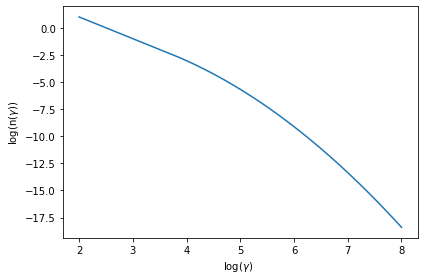

In [10]:
p=my_jet.electron_distribution.plot()

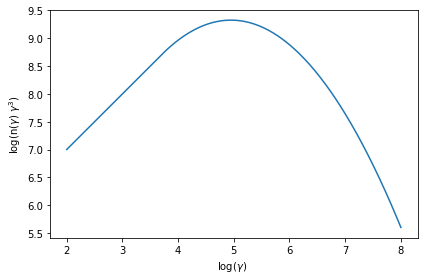

In [11]:
p=my_jet.electron_distribution.plot3p()


In [12]:
my_jet.eval()

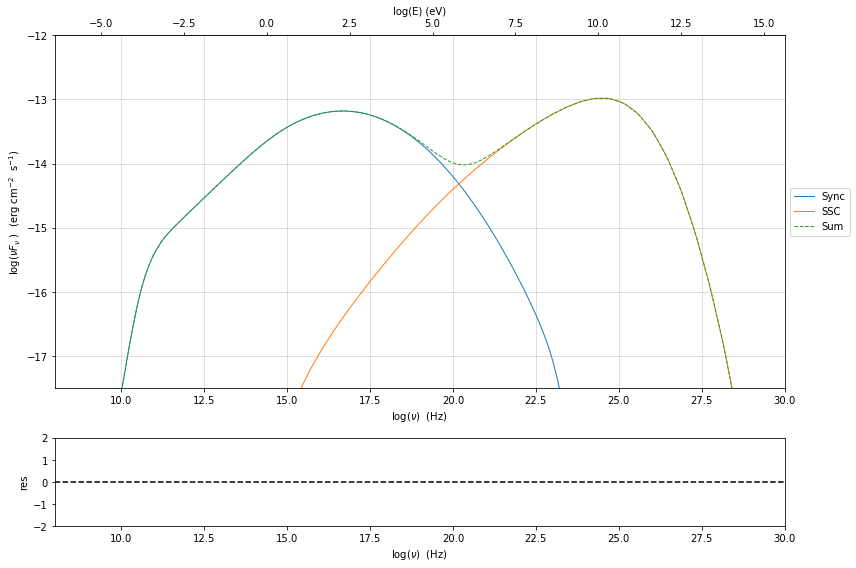

In [13]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_max=-12,y_min=-17.5,x_min=8)

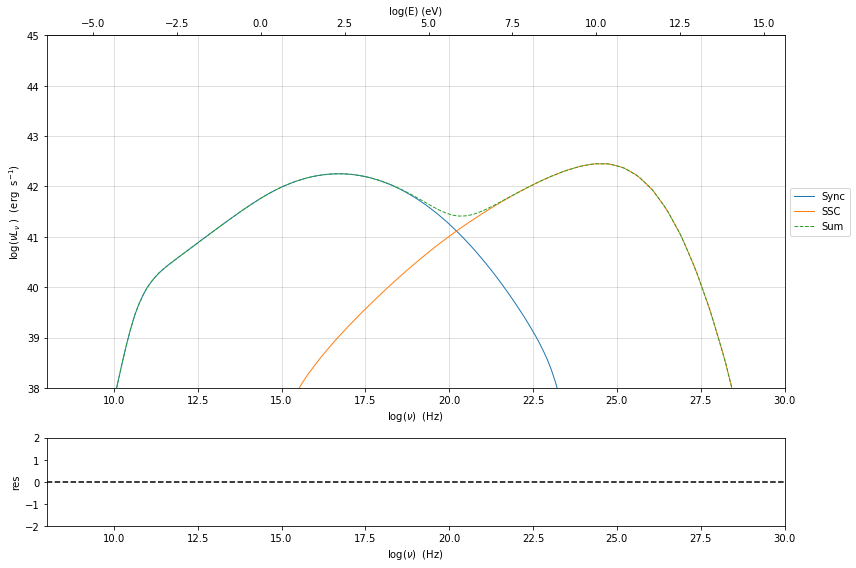

In [14]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=45,y_min=38,x_min=8)

In [15]:
my_jet.list_spectral_components()


Sum
Sync
SSC


In [16]:
Sync=my_jet.spectral_components.Sync


In [17]:
Sync=my_jet.get_spectral_component_by_name('Sync')


In [18]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [19]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [20]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [21]:
t_obs[::10]


nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,1e-120,1e-120,1e-120
16070528.182616385,1.1378106394274924e-26,1.1378106394274924e-26,1e-120
258261876.06826746,4.732542155276009e-23,4.732542155276009e-23,1e-120
4150404757.8504725,1.993276175816049e-19,1.993276175816049e-19,1e-120
66699196630.30115,2.531597171763791e-16,2.531597171763791e-16,1e-120
1071891319205.1265,1.7156783243433755e-15,1.7156783204048868e-15,3.8720148903785615e-24
17225859653987.84,6.767092745181655e-15,6.767091835037548e-15,8.94809492144934e-22
276828663039206.1,2.366452201451477e-14,2.3664383967973102e-14,1.362886284284897e-19


In [22]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [23]:
t_obs['Sync'][::10].to('GeV/cm2 s')

<Quantity [6.24150907e-118, 7.10165543e-024, 2.95382048e-020,
           1.24410513e-016, 1.58009867e-013, 1.07084218e-012,
           4.22368651e-012, 1.47701467e-011, 3.31699518e-011,
           4.09679603e-011, 2.74261407e-011, 9.87373833e-012,
           1.89469542e-012, 1.92750509e-013, 8.43151500e-015,
           8.80760755e-022, 6.24150907e-118, 6.24150907e-118,
           6.24150907e-118, 6.24150907e-118] GeV / (cm2 s)>

In [24]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite='True')


In [25]:
my_jet.energetic_report()


-----------------------------------------------------------------------------------------
jet eneregetic report:
     name                   type               units       val     
-------------- ----------------------------- --------- ------------
           U_e Energy dens. blob rest. frame erg / cm3 4.962405e-01
      U_p_cold Energy dens. blob rest. frame erg / cm3 3.743542e+01
           U_B Energy dens. blob rest. frame erg / cm3 1.591549e-03
           U_p Energy dens. blob rest. frame erg / cm3 0.000000e+00
    U_p_target Energy dens. blob rest. frame erg / cm3 0.000000e+00
       U_Synch Energy dens. blob rest. frame erg / cm3 1.319307e-02
   U_Synch_DRF Energy dens. disk rest. frame erg / cm3 1.319307e+02
        U_Disk Energy dens. blob rest. frame erg / cm3 0.000000e+00
         U_BLR Energy dens. blob rest. frame erg / cm3 0.000000e+00
          U_DT Energy dens. blob rest. frame erg / cm3 0.000000e+00
         U_CMB Energy dens. blob rest. frame erg / cm3 0.000000e+00
   

In [26]:
my_jet.energetic_report_table


name,type,units,val
str14,str29,object,float64
U_e,Energy dens. blob rest. frame,erg / cm3,4.962405e-01
U_p_cold,Energy dens. blob rest. frame,erg / cm3,3.743542e+01
U_B,Energy dens. blob rest. frame,erg / cm3,1.591549e-03
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_Synch,Energy dens. blob rest. frame,erg / cm3,1.319307e-02
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,1.319307e+02
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


In [27]:
my_jet.save_model('test_model.pkl')


In [28]:
my_jet_new=Jet.load_model('test_model.pkl')


      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.000000e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+08     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+03     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 5.000000e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 1.000000e+15     1.000000e+03     1.000000e

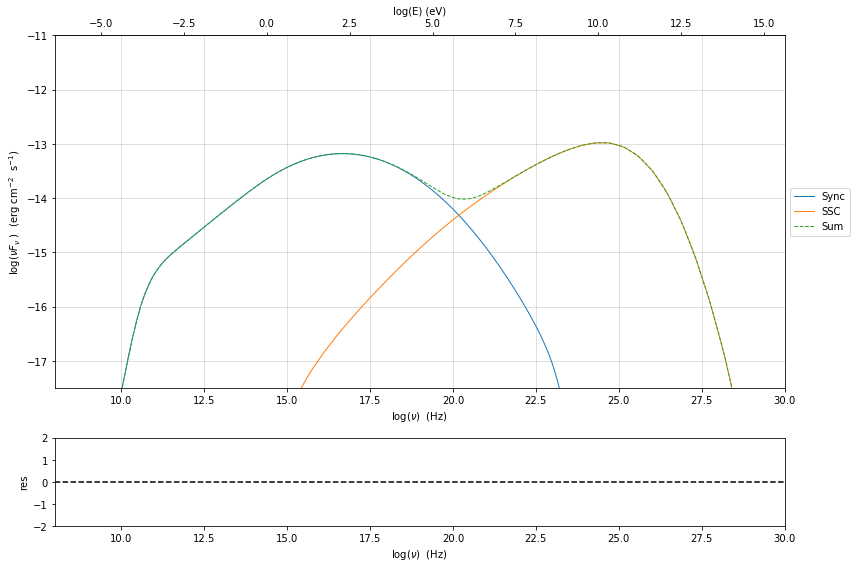

In [29]:
my_plot=my_jet_new.plot_model()
my_plot.rescale(y_max=-11,y_min=-17.5,x_min=8)

## Define custom emiotters distribution

See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/custom_emitters_distr/custom_emitters.html

In [80]:
from jetset.jet_emitters import EmittersDistribution


In [81]:
def distr_func_super_exp(gamma,gamma_cut,s,a):
    return np.power(gamma,-s)*np.exp(-(1/a)*(gamma/gamma_cut)**a)

In [82]:
n_e_super_exp=EmittersDistribution('super_exp')
n_e_super_exp.add_par('gamma_cut',par_type='turn-over-energy',val=50000.,vmin=1., vmax=None, unit='lorentz-factor')
n_e_super_exp.add_par('s',par_type='LE_spectral_slope',val=2.3,vmin=-10., vmax=10, unit='')
n_e_super_exp.add_par('a',par_type='spectral_curvature',val=1.8,vmin=0., vmax=100., unit='')

In [83]:
n_e_super_exp.set_distr_func(distr_func_super_exp)


In [84]:
n_e_super_exp.parameters.show_pars()


   name         par type           units          val      phys. bound. min phys. bound. max  log  frozen
--------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
     gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
     gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
        N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
gamma_cut    turn-over-energy lorentz-factor* 5.000000e+04     1.000000e+00               -- False  False
        s   LE_spectral_slope                 2.300000e+00    -1.000000e+01     1.000000e+01 False  False
        a  spectral_curvature                 1.800000e+00     0.000000e+00     1.000000e+02 False  False


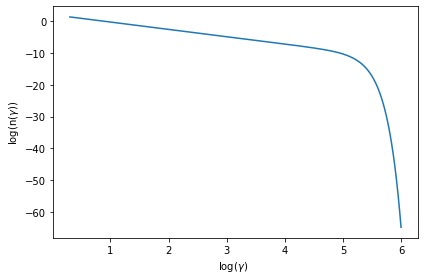

In [85]:
p=n_e_super_exp.plot()


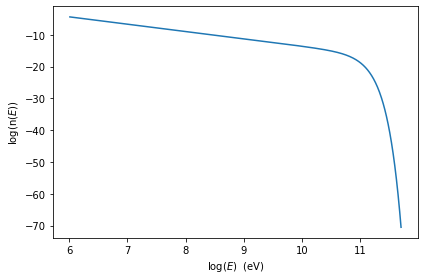

In [86]:
p=n_e_super_exp.plot(energy_unit='eV')


In [87]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution=n_e_super_exp)

In [88]:
my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  1000
 gmin grid : -1.000000e+00
 gmax grid : -1.000000e+00
 normalization  False
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

   name         par type           units          val      phys. bound. min phys. bound. max  log  frozen
--------- ------------------- --------------- --------

In [89]:
my_jet.eval()


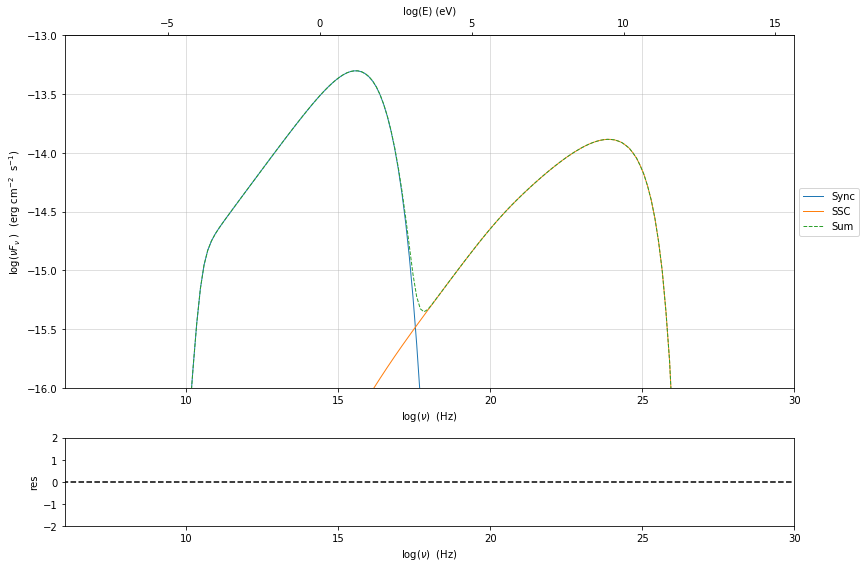

In [90]:
p=my_jet.plot_model()
p.rescale(y_min=-16,y_max=-13)

In [91]:
n_e_super_exp.normalize=True

In [92]:

my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()



-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

   name         par type           units          val      phys. bound. min phys. bound. max  log  frozen
--------- ------------------- --------------- ----------

In [93]:
my_jet.plot_model(p,comp='Sum',label='Normalized distr')
p.rescale(y_min=-16,y_max=-12)

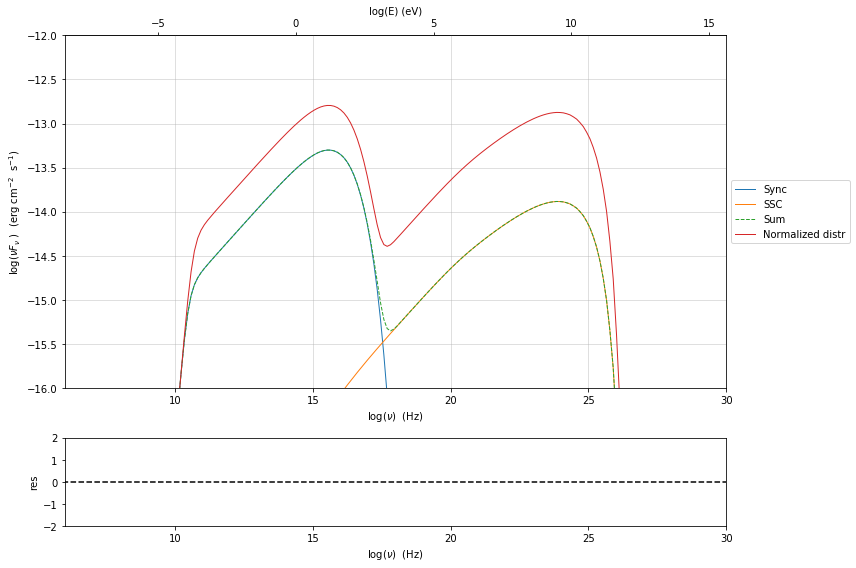

In [94]:
p.fig